# <h1><center><font size='7'>Leaves Diseases 24 Classes</font></center></h1>

***I used a pretrained model named VGG16 instead of creating the layers myself since there are 24 classes which is a lot relatively. After training the model, I achieved a model that distinguish diseases of leaves with nearly %85 accuracy.***

In [4]:
import os
import matplotlib.image as mpimg
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import matplotlib.pyplot as plt

In [6]:
path = r"C:\Users\Safak\OneDrive\Masaüstü\TRAIN_LEAVES\train"

# get the list of file names in the specified path
file_names = os.listdir(path)

# extract the class names from the file names
classes = [file_name.split('.')[0] for file_name in file_names]

# remove duplicates and sort the class names
classes = sorted(list(set(classes)))
class_number = len(classes)
print(classes)
print(class_number)

['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Target_Spot', 'Tomato_Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_Tomato_mosaic_virus', 'Tomato_Two_spotted_spider_mite', 'Tomato_healthy', 'corn_Blight', 'corn_Common_Rust', 'corn_Healthy', 'grape_black_rot', 'grape_esca_(black_measles)', 'grape_healthy', 'grape_leaf_blight_(isariopsis_leaf_spot)', 'peach_bacterial_spot', 'peach_healthy', 'pepper_bacterial_spot', 'pepper_healthy', 'potato_early_blight', 'potato_healthy', 'potato_late_blight']
24


**Note:** While uploading the txt file to flutter, I removed the underscores.

In [3]:
label_names_txt = "leaf_diseases_24_classes_CPU.txt"
# write class names and indices to the text file
with open(label_names_txt, "w") as file:
    for index, class_name in enumerate(classes):
        file.write(f"{index} {class_name}\n")

In [4]:
# train and validation data paths
train_dir = os.path.join(r"C:\Users\Safak\OneDrive\Masaüstü\TRAIN_LEAVES\train")
validation_dir = os.path.join(r'C:\Users\Safak\OneDrive\Masaüstü\TRAIN_LEAVES\validation')
test_dir = os.path.join(r"C:\Users\Safak\OneDrive\Masaüstü\TRAIN_LEAVES\test")

trains = []
validations = []

# train and validation data paths for each class are stored
for i in range(len(classes)):
    trains.append(os.path.join(train_dir, classes[i]))
    validations.append(os.path.join(validation_dir, classes[i]))

In [5]:
# add the data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

In [6]:
# flow training images in batches of 256 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 256, class_mode = 'categorical', target_size = (224, 224))

# flow validation images in batches of 256 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(validation_dir,  batch_size = 256, class_mode = 'categorical', target_size = (224, 224))

# flow test images in batches of 256 using test_datagen generator
#test_generator = test_datagen.flow_from_directory(test_dir,  batch_size = 256, class_mode = 'categorical', target_size = (224, 224))

Found 20450 images belonging to 24 classes.
Found 6823 images belonging to 24 classes.


In [7]:
# retrieve the mapping of class labels to numerical indices
class_indices = train_generator.class_indices

# print the class indices
print(class_indices)

{'Tomato_Bacterial_spot': 0, 'Tomato_Early_blight': 1, 'Tomato_Late_blight': 2, 'Tomato_Leaf_Mold': 3, 'Tomato_Septoria_leaf_spot': 4, 'Tomato_Target_Spot': 5, 'Tomato_Tomato_Yellow_Leaf_Curl_Virus': 6, 'Tomato_Tomato_mosaic_virus': 7, 'Tomato_Two_spotted_spider_mite': 8, 'Tomato_healthy': 9, 'corn_Blight': 10, 'corn_Common_Rust': 11, 'corn_Healthy': 12, 'grape_black_rot': 13, 'grape_esca_(black_measles)': 14, 'grape_healthy': 15, 'grape_leaf_blight_(isariopsis_leaf_spot)': 16, 'peach_bacterial_spot': 17, 'peach_healthy': 18, 'pepper_bacterial_spot': 19, 'pepper_healthy': 20, 'potato_early_blight': 21, 'potato_healthy': 22, 'potato_late_blight': 23}


In [8]:
# load VGG16 model
base_model = VGG16(input_shape = (224, 224, 3), 
# leave out the last fully connected layer
include_top = False, 
weights = 'imagenet')

In [9]:
# set the 'trainable' property of the layer to False
for layer in base_model.layers:
    layer.trainable = False

In [10]:
# flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# add a final softmax layer
x = layers.Dense(class_number, activation='softmax')(x) 

# model is stored here
model = tf.keras.models.Model(base_model.input, x)

# compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['acc'])

C:\Users\Safak\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

***The model could have been run for a few more steps since the accuracy is still increasing and not that high at that point but it takes too much time to run the model. Therefore, I couldn't run it again. This model took 8.30 hours to run on my CPU. Also, I don't know why but I cannot use my GPU and I did not want to upload all the images to Google Drive and pull them to Google Colab to train the model on CPU because I don't have enough space for that. However, I think that the algortihm still works good. Especially, better than the ones I trained myself.***

***I learned how to train a model better. I tried lots of things as you know. I think this was the best approach. At least, I got the idea of how to train a model both creating your own layers (for the anything vs leaves model) and only using last layer of a pretrained model (leaves diseases model).***

In [11]:
# train the model 10 epoch
vgghist = model.fit(train_generator, validation_data = validation_generator, epochs = 10) 

Epoch 1/10
80/80 [==============================] - 2478s 31s/step - loss: 1.9984 - acc: 0.4217 - val_loss: 0.9916 - val_acc: 0.6975
Epoch 2/10
80/80 [==============================] - 2421s 30s/step - loss: 1.2025 - acc: 0.6327 - val_loss: 0.7108 - val_acc: 0.7818
Epoch 3/10
80/80 [==============================] - 2758s 35s/step - loss: 0.9581 - acc: 0.6982 - val_loss: 0.5493 - val_acc: 0.8244
Epoch 4/10
80/80 [==============================] - 2544s 32s/step - loss: 0.8291 - acc: 0.7389 - val_loss: 0.5015 - val_acc: 0.8419
Epoch 5/10
80/80 [==============================] - 2397s 30s/step - loss: 0.7517 - acc: 0.7608 - val_loss: 0.4367 - val_acc: 0.8618
Epoch 6/10
80/80 [==============================] - 2398s 30s/step - loss: 0.6924 - acc: 0.7787 - val_loss: 0.4062 - val_acc: 0.8681
Epoch 7/10
80/80 [==============================] - 2401s 30s/step - loss: 0.6523 - acc: 0.7863 - val_loss: 0.4015 - val_acc: 0.8647
Epoch 8/10
80/80 [==============================] - 2394s 30s/step - 

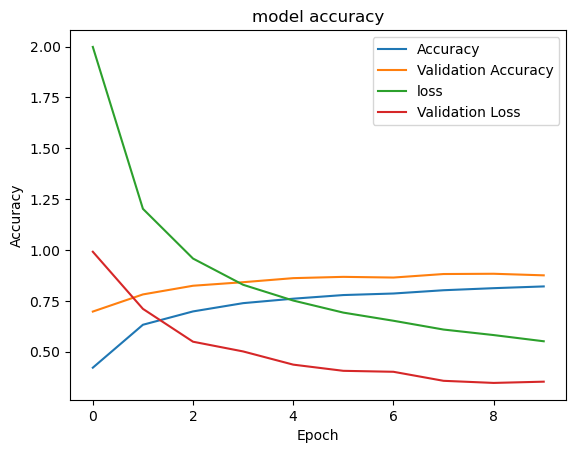

In [12]:
# plot the model accuracy and loss for train and validation dataset
plt.plot(vgghist.history["acc"])
plt.plot(vgghist.history['val_acc'])
plt.plot(vgghist.history['loss'])
plt.plot(vgghist.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Validation Accuracy','loss','Validation Loss'])
plt.show()

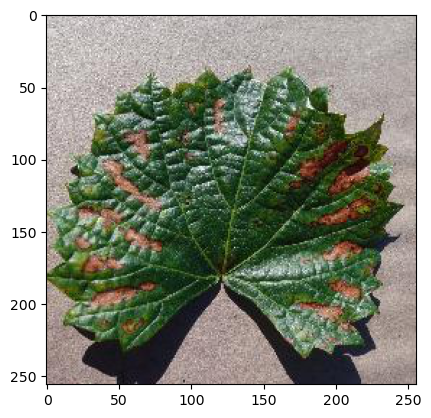

In [56]:
# read an image from the test set and plot it
img = cv2.imread(r"C:\Users\Safak\OneDrive\Masaüstü\TRAIN_LEAVES\test\grape_esca_(black_measles)\d0ece967-f1da-4666-8a0e-5a857bf906f7___FAM_B.Msls 1021_flipLR.JPG")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

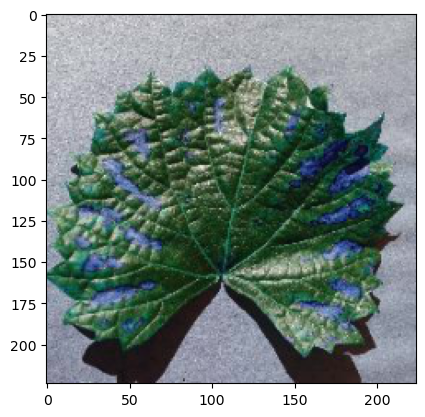

1/1 [==============================] - 0s 117ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 7.4302425e-29 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 4.5066056e-27 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
Class: grape_esca_(black_measles), Probability: 1.0
Class: grape_black_rot, Probability: 4.506605580830167e-27
Class: Tomato_Tomato_mosaic_virus, Probability: 7.430242540270817e-29
Class: Tomato_Bacterial_spot, Probability: 0.0
Class: potato_early_blight, Probability: 0.0


In [57]:
# resize image to 224x224
resized_img = tf.image.resize(img, (224, 224))

# add extra dimension
resized_img = tf.expand_dims(resized_img, axis=0)  

# show the image
plt.imshow(resized_img[0].numpy().astype(int))
plt.show()

# predict the disease
yhat = model.predict(resized_img)
print(yhat)

# find the indices of the highest 5 values in yhat
top_indices = np.argsort(-yhat[0])[:5]  

for index in top_indices:
    predicted_class_index = index
    predicted_class_name = classes[predicted_class_index]
    predicted_probability = yhat[0, predicted_class_index]
    print(f"Class: {predicted_class_name}, Probability: {predicted_probability}")

***I wanted to learn the accuracy of the classes one by one since I thought that the counfusion matrix doesn't give me the correct results.***

In [14]:
dir_path = r"C:\Users\Safak\OneDrive\Masaüstü\TRAIN_LEAVES\test\peach_bacterial_spot"
class_name = "peach_bacterial_spot"
true_results = 0
all_results = 0
for filename in os.listdir(dir_path):
    if filename.endswith(".jpg") or filename.endswith(".PNG") or filename.endswith(".png") or filename.endswith(".jpeg") or filename.endswith(".JPG") or filename.endswith(".JPEG"):
        img_name = filename
        img_name = dir_path + '\\' + img_name
        img = cv2.imread(img_name)
        
        resize = tf.image.resize(img, (224, 224))
        #plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
        yhat = model.predict(np.expand_dims(resize / 255, 0))
        max_index = np.argmax(yhat)
        if(classes[max_index] == class_name):
            true_results+=1
        #print(classes[max_index])
        all_results+=1
        
result = (100*true_results)/all_results
print("the accuracy is " + str(result) +"% for the class" + class_name)

1/1 [==============================] - 0s 163ms/step


1/1 [==============================] - 0s 158ms/step


1/1 [==============================] - 0s 157ms/step
the accuracy is 90.03021148036254% for the classpeach_bacterial_spot


In [41]:
# loading the test data
test_generator = test_datagen.flow_from_directory(r"C:\Users\Safak\OneDrive\Masaüstü\TRAIN_LEAVES\test",  batch_size = 256, class_mode = 'categorical', target_size = (224, 224))

Found 6821 images belonging to 24 classes.


In [42]:
# evaluate the test data to see the accuracy and loss of the model
model.evaluate(test_generator)

27/27 [==============================] - 631s 22s/step - loss: 0.4347 - acc: 0.8585


[0.4347022473812103, 0.8585251569747925]

In [ ]:
# true labels from the validation dataset
y_true = validation_generator.classes

# predicted labels using the trained model
y_pred = model.predict(validation_generator)

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)  

print(y_pred)
print(y_true)

In [15]:
# save the model
model.save("leaf_diseases_24_classes_CPU.h5")

In [27]:
from tensorflow.keras.models import load_model

# Load the saved model
model_new = load_model("leaf_diseases_24_classes_CPU.h5")

In [28]:
# load data from directory with opencv to np array
def load_data_from_directory(directory, index):
    images = []
    labels = []
    for filename in os.listdir(directory):        
        img = cv2.imread(os.path.join(directory,filename))        
        # resize the image to 224x224
        img = cv2.resize(img,(224,224))
        if img is not None:
            images.append(img)
            labels.append(index)
    return images,labels

In [29]:
main_dir = r"C:\Users\Safak\OneDrive\Masaüstü\TRAIN_LEAVES\test"
file_names = os.listdir(main_dir)

# take the path of the files
image_paths = [os.path.join(main_dir, file_name) for file_name in file_names]

X = []
y = []
for i in range(len(image_paths)):
    image, label = load_data_from_directory(image_paths[i], i)
    X.append(image)
    y.append(label)

In [30]:
# convert the file paths to np array
X = np.array(X)
y = np.array(y)

C:\Users\Safak\AppData\Local\Temp\ipykernel_22188\457373473.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)
C:\Users\Safak\AppData\Local\Temp\ipykernel_22188\457373473.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y = np.array(y)


In [ ]:
# iterate over each sample in X and merge all the images
all_X = []
for i in range(len(X)):
    for j in range(len(X[i])):
        all_X.append(X[i][j])
#print(len(all_X))

# iterate over each sample in X and merge all the labels
all_y = []
for i in range(len(y)):
    for j in range(len(y[i])):
        all_y.append(y[i][j])
#print(len(all_y))


In [ ]:
# convert the images and labels to np array
all_X = np.array(all_X)
all_y = np.array(all_y)
#print(all_X.shape)

In [ ]:
predictions = []

# predict to create confusion matrix
for i in range(len(all_X)):  
    temp = np.expand_dims(all_X[i], axis=0)
    prediction = loaded_model.predict(temp)
    predictions.append(np.argmax(prediction, axis=1))

***The confusion matrix doesn't seem correct because as you can see from the previous codes, the result is like that [0.4347022473812103, 0.8585251569747925] when the model is evaluated. The accuracy of the model is nearly 85% whereas the loss is %40. The loss is a bit higher than normal. Also, when I evaluated every class one by one as you can see from the previous codes, the accuracy is between %60-%95. Therefore, I think that I made a mistake while creating the confusion matrix but I could't solve the problem. Still, I wanted to put the confusion matrix to the jupyter notebook and show you the results.***

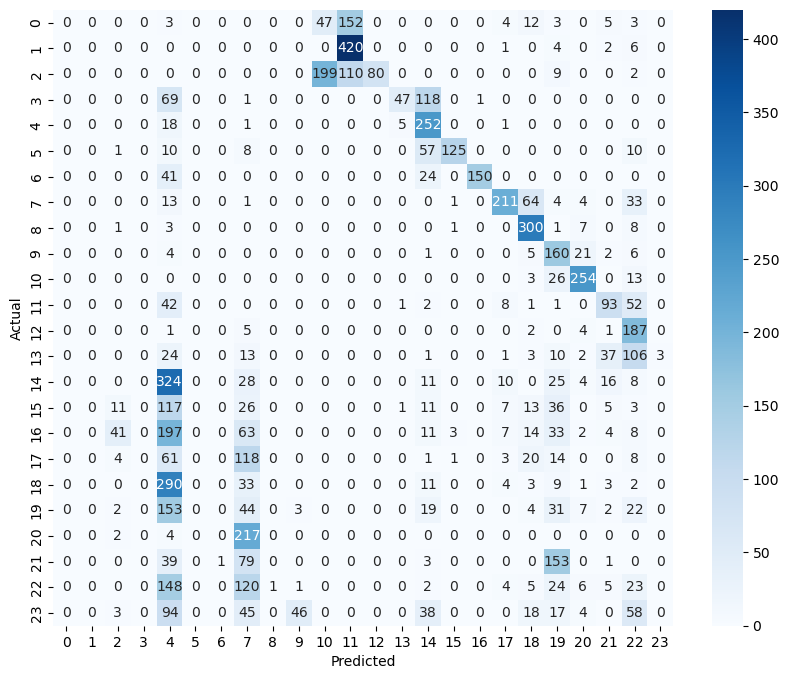

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# confusion matrix
cm = tf.math.confusion_matrix(all_y, predictions)

# plot the confusion matrix using matplotlib
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
# load and save the model to tflite
model = tf.keras.models.load_model('leaf_diseases_24_classes_CPU.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("leaf_diseases_24_classes_CPU.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Safak\AppData\Local\Temp\tmpp08_3qdc\assets


INFO:tensorflow:Assets written to: C:\Users\Safak\AppData\Local\Temp\tmpp08_3qdc\assets


110450548